In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [30]:
df = pd.read_csv('table1- International migrant stock.csv', index_col=[0], skiprows=14)
df4 = pd.read_csv('country_reference.csv')

In [18]:
df.columns = ['Major area, region, country or area of destination', 'Notes',
       'Country code', 'Type of data (a)',
       'International migrant stock at mid-year (both sexes)1990', 'International migrant stock at mid-year (both sexes)1995',
       'International migrant stock at mid-year (both sexes)2000', 'International migrant stock at mid-year (both sexes)2005', 
       'International migrant stock at mid-year (both sexes)2010', 'International migrant stock at mid-year (both sexes)2015',
       'International migrant stock at mid-year (male)1990', 'International migrant stock at mid-year (male)1995',
       'International migrant stock at mid-year (male)2000', 'International migrant stock at mid-year (male)2005', 'International migrant stock at mid-year (male)2010', 'International migrant stock at mid-year (male)2015',
       'International migrant stock at mid-year (female)1990', 'International migrant stock at mid-year (female)1995',
       'International migrant stock at mid-year (female)2000', 'International migrant stock at mid-year (female)2005','International migrant stock at mid-year (female)2010', 'International migrant stock at mid-year (female)2015',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42']

df = df.drop(columns=['Major area, region, country or area of destination', 'Notes','Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'])

df = df.dropna(subset = ['Type of data (a)']).drop(columns=['Type of data (a)'])

In [19]:
df_melt = df.melt (
    id_vars=['Country code'], 
    var_name=['year'], 
    value_name='amount'
    )

df_seperate = df_melt.assign (
    Year = lambda x: x.year.str[-4:], Gender = lambda x:x.year.str[41:46]
).drop(columns =['year'], axis=0).replace('femal', 'female')

In [24]:
df1 = df_seperate.rename(columns={'amount':'Amount'})

<AxesSubplot:xlabel='Year', ylabel='Amount'>

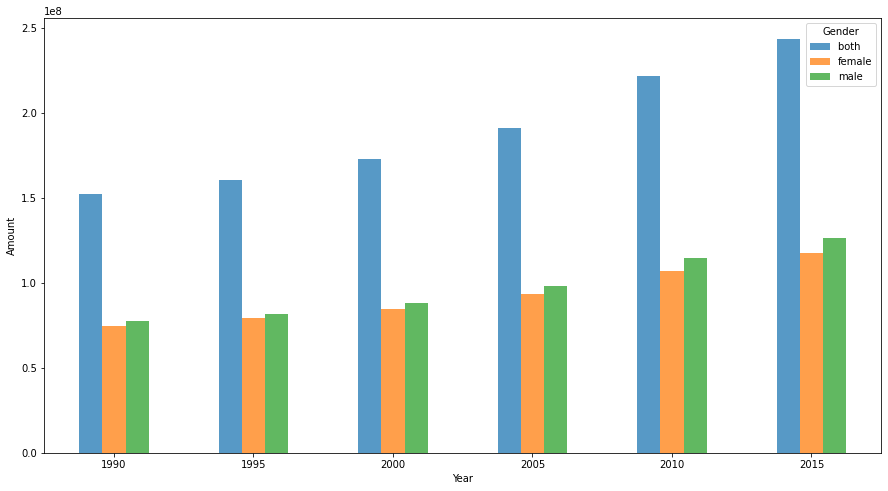

In [25]:
df1['Amount'] = df1['Amount'].str.strip()
df1['Amount'] = df1['Amount'].str.replace(" ","")
df1['Amount'] = df1['Amount'].fillna(0)
df1['Amount'] = pd.to_numeric(df1['Amount'], errors='coerce')

df1["Gender"].replace({'male)': 'male'}, inplace=True)
df1.groupby(['Year', 'Gender']).sum()
test1 = pd.DataFrame(df1.groupby(['Year', 'Gender']).sum(), columns = ['Amount'])

# graphic_1, table 1 year, migrant stocks, genders
graphic_1 = pd.pivot_table(test1, index='Year', columns='Gender', values='Amount')
graphic_1.plot(kind='bar', figsize=(15,8), alpha=0.75, rot=0, ylabel='Amount')

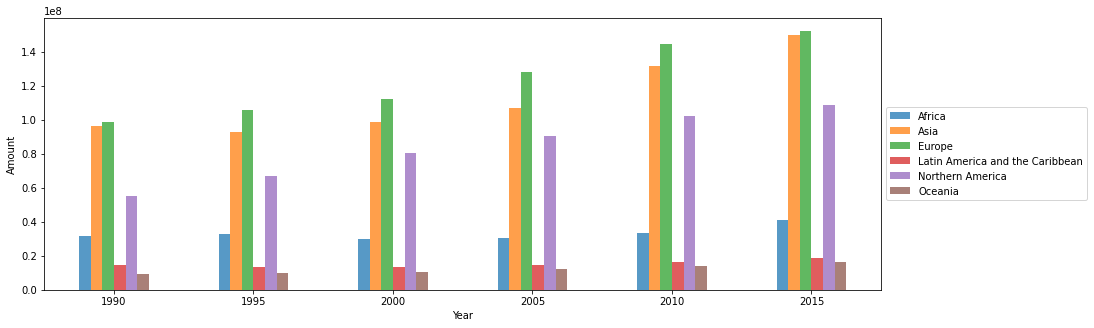

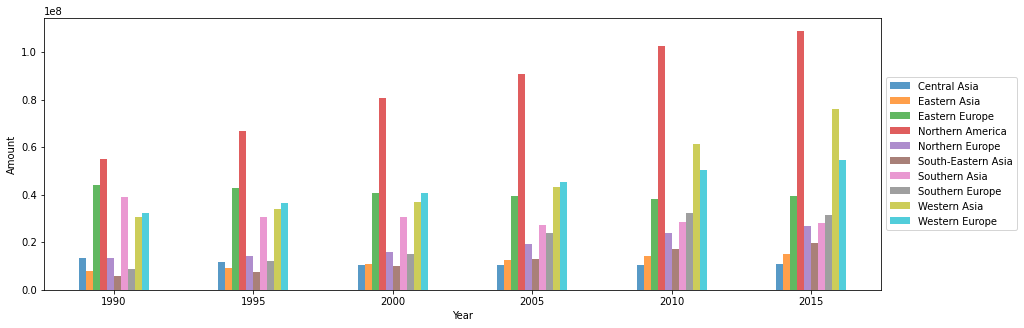

In [31]:
df4_reference = df4[['Country code','Major area' ,'Region', 'Developed region', 'Least developed country']]
df1_4 = pd.merge(df1,df4_reference,on=['Country code'],how='left')

# graphic2, migrant stocks, major area
test2 = df1_4.groupby(['Year', 'Major area']).sum().drop(columns=['Country code'])
graphic_2 = pd.pivot_table(test2, index='Year', columns='Major area', values='Amount')
graphic_2.plot(kind='bar', figsize=(15,5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

#highest 3: Asia, Europe, Northern America, dive into these 3 areas region

test3 = df1_4.loc[(df1_4['Major area'] == 'Asia') | (df1_4['Major area'] == 'Europe')  
                   | (df1_4['Major area'] == 'Northern America')].groupby(['Year', 'Region']).sum().drop(columns=['Country code'])
graphic_3 = pd.pivot_table(test3, index='Year', columns='Region', values='Amount')
graphic_3.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))